In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import re
%matplotlib notebook

In [2]:
coaches=pd.read_excel('certified_coaches.xls',header=3,skip_footer=5,index_col=0).iloc[:,2:8]
coaches.fillna(0,inplace=True)
coaches.loc['Rest of Certified Coaches(person)']=(coaches.loc['Number of Certified Coaches(person)']-
                                                 coaches.loc['Number of Certified Coaches at National Level(person)']-
                                                 coaches.loc['Number of Senior Grade Certified Coaches(person)'])
coaches.loc['Rest of Certified Female Coaches(person)']=(coaches.loc['Number of Certified Female Coaches(person)']-
                                                         coaches.loc['Number of Certified Female Coaches at National Level(person)']-
                                                         coaches.loc['Number of Senior Grade Certified Female Coaches(person)'])
coaches.loc['Number of Certified Male Coaches(person)']=(coaches.loc['Number of Certified Coaches(person)']-
                                                         coaches.loc['Number of Certified Female Coaches(person)'])
coaches

,2015,2014,2013,2012,2011,2010
Indicators,,,,,,
Number of Certified Coaches(person),104.0,111.0,85.0,49.0,80.0,178.0
Number of Certified Female Coaches(person),27.0,27.0,22.0,10.0,27.0,57.0
Number of Certified Coaches at National Level(person),3.0,3.0,6.0,2.0,2.0,5.0
Number of Certified Female Coaches at National Level(person),2.0,2.0,1.0,0.0,0.0,0.0
Number of Senior Grade Certified Coaches(person),14.0,12.0,4.0,13.0,9.0,57.0
Number of Senior Grade Certified Female Coaches(person),2.0,1.0,1.0,4.0,3.0,15.0
Rest of Certified Coaches(person),87.0,96.0,75.0,34.0,69.0,116.0
Rest of Certified Female Coaches(person),23.0,24.0,20.0,6.0,24.0,42.0
Number of Certified Male Coaches(person),77.0,84.0,63.0,39.0,53.0,121.0


In [3]:
athletes=pd.read_excel('certified_athletes.xls',header=3,skip_footer=1,index_col=0).iloc[:,2:8]
athletes=(athletes.replace(to_replace=r'[,]+',value='',regex=True)  #remove the comma seperator
         .fillna(0)
         .astype(float))
athletes.loc['Number of Certified Male Athletes(person)']=(athletes.loc['Number of Certified Athletes(person)']-
                                                           athletes.loc['Number of Certified Female Athletes(person)'])
df = pd.merge(coaches.T,athletes.T,how='outer',left_index=True,right_index=True)
df['Athletes per Certified Coaches'] = df['Number of Certified Athletes(person)'] // df['Number of Certified Coaches(person)']
df

Indicators,Number of Certified Coaches(person),Number of Certified Female Coaches(person),Number of Certified Coaches at National Level(person),Number of Certified Female Coaches at National Level(person),Number of Senior Grade Certified Coaches(person),Number of Senior Grade Certified Female Coaches(person),Rest of Certified Coaches(person),Rest of Certified Female Coaches(person),Number of Certified Male Coaches(person),Number of Certified Athletes(person),...,Number of Certified International Master of Sports(person),Number of Certified Female International Master of Sports(person),Number of Certified Master of Sports(person),Number of Certified Female Master of Sports(person),Number of Certified Athletes of First Grade(person),Number of Certified Female Athletes of First Grade(person),Number of Certified Athletes of Second Grade,Number of Certified Female Athletes of Second Grade(person),Number of Certified Male Athletes(person),Athletes per Certified Coaches
2015,104.0,27.0,3.0,2.0,14.0,2.0,87.0,23.0,77.0,1963.0,...,16.0,11.0,136.0,74.0,581.0,268.0,1230.0,445.0,1165.0,18.0
2014,111.0,27.0,3.0,2.0,12.0,1.0,96.0,24.0,84.0,2452.0,...,17.0,9.0,113.0,45.0,754.0,386.0,1568.0,627.0,1385.0,22.0
2013,85.0,22.0,6.0,1.0,4.0,1.0,75.0,20.0,63.0,3331.0,...,9.0,7.0,113.0,65.0,692.0,316.0,2517.0,905.0,2038.0,39.0
2012,49.0,10.0,2.0,0.0,13.0,4.0,34.0,6.0,39.0,2699.0,...,22.0,9.0,255.0,122.0,507.0,225.0,1915.0,675.0,1668.0,55.0
2011,80.0,27.0,2.0,0.0,9.0,3.0,69.0,24.0,53.0,1554.0,...,0.0,0.0,0.0,0.0,442.0,193.0,1112.0,403.0,958.0,19.0
2010,178.0,57.0,5.0,0.0,57.0,15.0,116.0,42.0,121.0,2205.0,...,0.0,0.0,0.0,0.0,632.0,347.0,1573.0,533.0,1325.0,12.0


<IPython.core.display.Javascript object>


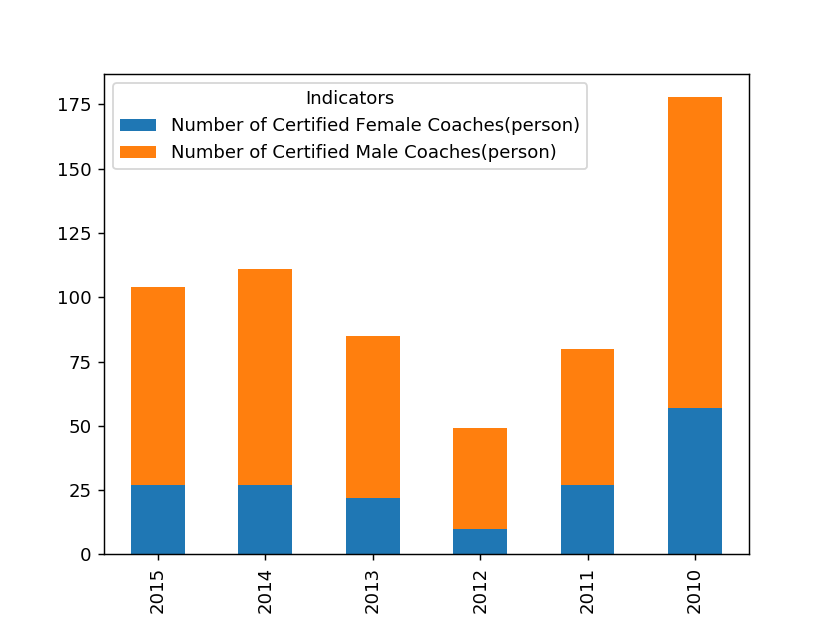

<IPython.core.display.Javascript object>


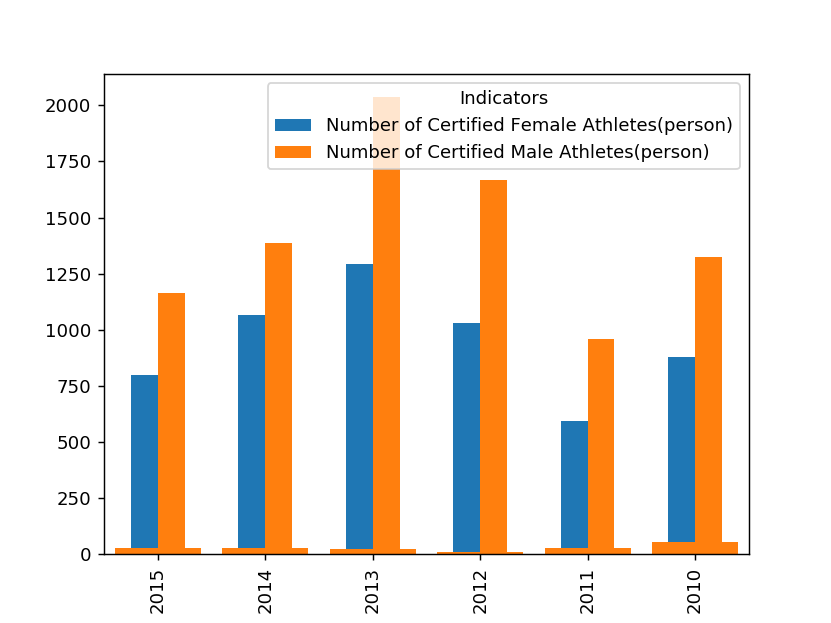

In [61]:
#df.plot.bar(y=['Number of Certified Female Coaches(person)',
#               'Number of Certified Male Coaches(person)'],stacked=True)
#df.plot.bar(y=['Number of Certified Female Athletes(person)',
#               'Number of Certified Male Athletes(person)'],stacked=False)

<IPython.core.display.Javascript object>


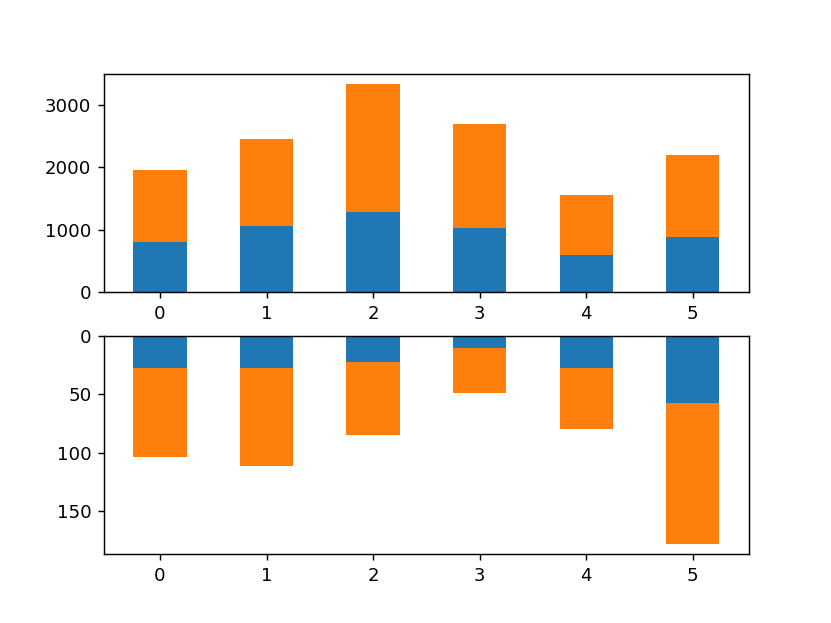

<Container object of 6 artists>

In [80]:
# plt.figure()
# ax1 = plt.subplot(212)
# ax1.invert_yaxis()
# plt.bar(np.arange(0,6,1),height=df['Number of Certified Female Coaches(person)'],
#        width=0.5, bottom=0)
# plt.bar(np.arange(0,6,1),height=df['Number of Certified Male Coaches(person)'],
#        width=0.5, bottom=df['Number of Certified Female Coaches(person)'])
# ax2 = plt.subplot(211,sharex=ax1)
# plt.bar(np.arange(0,6,1),height=df['Number of Certified Female Athletes(person)'],
#        width=0.5, bottom=0)
# plt.bar(np.arange(0,6,1),height=df['Number of Certified Male Athletes(person)'],
#        width=0.5, bottom=df['Number of Certified Female Athletes(person)'])

<IPython.core.display.Javascript object>


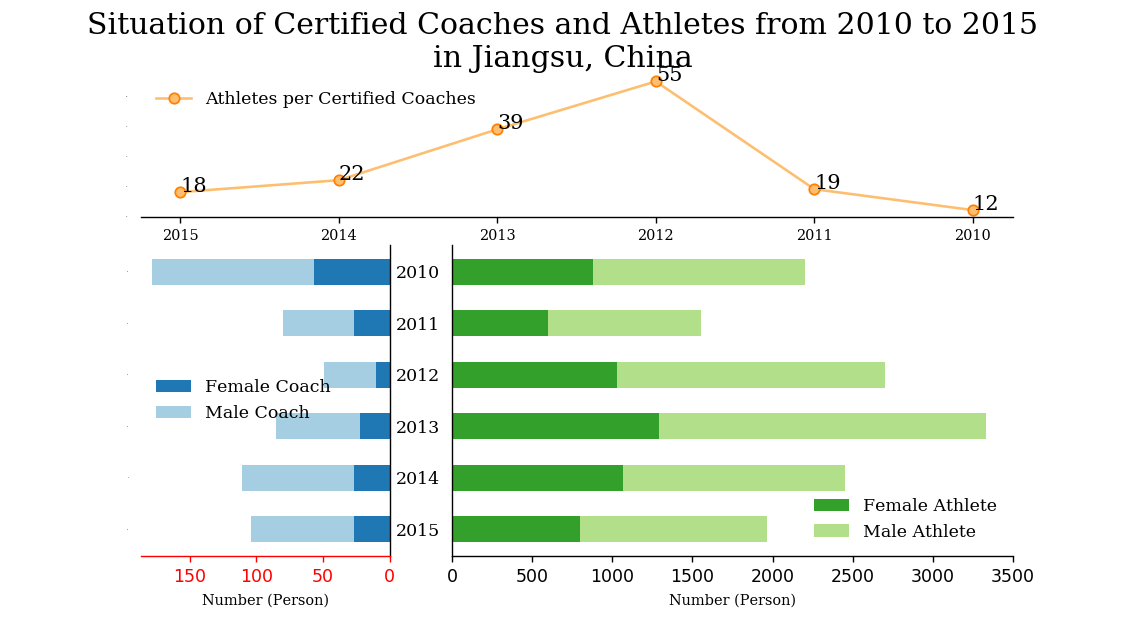

<Container object of 6 artists>

In [4]:
plt.figure(figsize=(9,5))
palette=sns.color_palette("Paired",8)
y_pos = np.arange(0,6,1)
gspec = gridspec.GridSpec(3,3)
upper_lines = plt.subplot(gspec[0,:])
left_bars = plt.subplot(gspec[1:,0])
right_bars = plt.subplot(gspec[1:,1:])
upper_lines.plot(y_pos, df['Athletes per Certified Coaches'],color=palette[6],
                 linestyle='-',marker='o',markeredgecolor=palette[7],
                 markerfacecolor=palette[6])
left_bars.invert_xaxis()
left_bars.barh(y_pos,width=df['Number of Certified Female Coaches(person)'],
        height=0.5, left=0,color=palette[1],label='Female Coach')
left_bars.barh(y_pos,width=df['Number of Certified Male Coaches(person)'],
        height=0.5, left=df['Number of Certified Female Coaches(person)'],
        color=palette[0],label='Male Coach')
right_bars.barh(y_pos,width=df['Number of Certified Female Athletes(person)'],
        height=0.5, left=0,
        color=palette[3],label='Female Athlete')
right_bars.barh(y_pos,width=df['Number of Certified Male Athletes(person)'],
        height=0.5, left=df['Number of Certified Female Athletes(person)'],
        color=palette[2],label='Male Athlete')

In [5]:
#upper lines text control
for xy in zip(y_pos, df['Athletes per Certified Coaches']):
    upper_lines.annotate('{0:.0f}'.format(xy[1]),xy=xy,xycoords='data',
                         **{'family': 'serif', 'weight': 'medium', 'size': 'large'})

In [6]:
#spine and tick control
ticklabel = {'family': 'serif', 'weight': 'light', 'size': 'small'}

upper_lines.tick_params(axis='y',labelsize=0,left=False,bottom=False)
upper_lines.spines['left'].set_visible(False)
upper_lines.spines['top'].set_visible(False)
upper_lines.spines['right'].set_visible(False)
upper_lines.set_xticks(y_pos)
upper_lines.set_xticklabels(df.index,**ticklabel)


left_bars.tick_params(axis='y',labelsize=0,left=False,top=False)
left_bars.tick_params(axis='x',color='red',labelcolor='red')  #emphasize the x-axis
left_bars.spines['bottom'].set_edgecolor('red')
left_bars.spines['left'].set_visible(False)
left_bars.spines['top'].set_visible(False)
right_bars.set_yticks(y_pos)
right_bars.set_yticklabels(df.index,**ticklabel)  #set the label of y ticks
right_bars.tick_params(axis='y',labelsize=10,left=False)
right_bars.spines['right'].set_visible(False)
right_bars.spines['top'].set_visible(False)

In [7]:
#legend and title control
legend_prop={'family': 'serif', 'weight': 'light', 'size': 'medium'}
title_prop={'family': 'serif', 'weight': 'light', 'size': 'x-large'}
upper_lines.legend(loc=0,prop=legend_prop,frameon=False)
left_bars.legend(loc=6,prop=legend_prop,frameon=False)
right_bars.legend(loc=4,prop=legend_prop,frameon=False)
plt.suptitle('Situation of Certified Coaches and Athletes from 2010 to 2015\nin Jiangsu, China',
            **{'family': 'serif', 'weight': 'light', 'size': 'xx-large'})
left_bars.set_xlabel('Number (Person)',**ticklabel)
right_bars.set_xlabel('Number (Person)',**ticklabel)
plt.subplots_adjust(wspace=0.25)
plt.savefig('ass4.pdf')

<IPython.core.display.Javascript object>


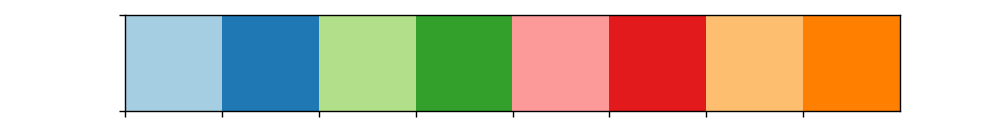

In [16]:
#import seaborn as sns
#sns.palplot(sns.color_palette("Paired",8))